In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [3]:
df = pd.read_csv('../input/digit-recognizer/train.csv')
df_test = pd.read_csv('../input/digit-recognizer/test.csv')

In [4]:
Y = df.label
Y = to_categorical(Y, num_classes=10)
X = df.drop(columns='label').values

X_test = df_test.values

In [5]:
X = X.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

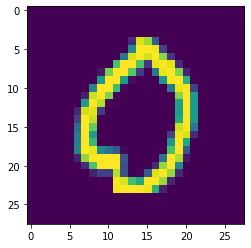

In [6]:
plt.imshow(X[267].reshape(28,28))

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X,Y)

In [9]:
train_datagen = ImageDataGenerator(rotation_range=20,
                                   rescale=1./255,
                                zoom_range = 0.1,
                                   width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.15,
                                    horizontal_flip=False,
                                    fill_mode="nearest")
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = train_datagen.flow(X_val, y_val, batch_size=32)


In [10]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

2021-12-10 10:43:25.749952: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-10 10:43:25.840009: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-10 10:43:25.840757: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-10 10:43:25.841902: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          1

In [12]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['accuracy'])

In [13]:
lr_reduc = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

history = model.fit(train_generator, validation_data = val_generator, batch_size=32, epochs=25, \
                    steps_per_epoch =X_train.shape[0]/32, callbacks=lr_reduc )

2021-12-10 10:43:28.436800: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2021-12-10 10:43:29.884165: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


984/984 [==============================] - 22s 16ms/step - loss: 0.7782 - accuracy: 0.7396 - val_loss: 0.2344 - val_accuracy: 0.9303
Epoch 2/25
984/984 [==============================] - 16s 16ms/step - loss: 0.2914 - accuracy: 0.9093 - val_loss: 0.1549 - val_accuracy: 0.9523
Epoch 3/25
984/984 [==============================] - 16s 16ms/step - loss: 0.2159 - accuracy: 0.9326 - val_loss: 0.1400 - val_accuracy: 0.9572
Epoch 4/25
984/984 [==============================] - 17s 17ms/step - loss: 0.1741 - accuracy: 0.9455 - val_loss: 0.0967 - val_accuracy: 0.9690
Epoch 5/25
984/984 [==============================] - 16s 17ms/step - loss: 0.1576 - accuracy: 0.9523 - val_loss: 0.0868 - val_accuracy: 0.9719
Epoch 6/25
984/984 [==============================] - 17s 17ms/step - loss: 0.1453 - accuracy: 0.9549 - val_loss: 0.0810 - val_accuracy: 0.9750
Epoch 7/25
984/984 [==============================] - 16s 16ms/step - loss: 0.1316 - accuracy: 0.9597 - val_loss: 0.0902 - val_accuracy: 0.9719
Epo

In [14]:
X_test = X_test/255

index_number = df_test.index + 1 

In [15]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=-1)

In [16]:
output = pd.DataFrame({'ImageId' : index_number, 'Label' : predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
